# Predicting Days Before Lapse for Marijuana Drug Abusers

In [88]:
import pandas as pd
pd.set_option('display.max_columns', None)

# read csv from github url
# return pandas dataframe
url = 'https://raw.githubusercontent.com/prathikr/CS_499_Final_Project/master/BISTRA_GROUP_PROJECT_SMALL.csv'
df = pd.read_csv(url)
df.head(5)

# display frequencies of each state in dataset
df.groupby('State').size()

State
AL     434
AR     198
AZ    2177
CA    3439
CO    1421
CT     663
DC      16
FL    2926
GA      68
HI     226
IA     284
ID     487
IL     498
KS      79
KY     310
LA     139
MA    1086
MD     257
MI     584
MO     877
NC      95
NH     160
NJ     181
NM     105
NV     172
NY     770
OH    1138
OK      31
OR     515
PA     487
RI     215
SC      61
TN     636
TX    4011
VA     378
VT     149
WA     743
WI     369
WV     162
WY       9
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c0caf28>]],
      dtype=object)

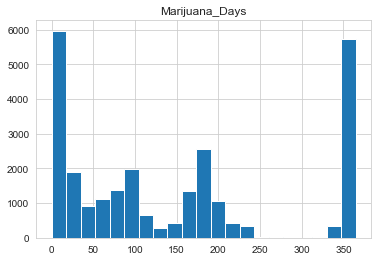

In [89]:
df = df[df.Marijuana_Days != -999] # removes all rows with Marijuana_Days = -999
df['zipcode'] = df['zipcode'].str[:5] # trim zip codes down to first 5 digits
df.hist(column='Marijuana_Days', bins=21) # 21 chosen so that there would be 3 bins between each x-axis number

In [90]:
print("Original df:", df.shape)

unused_potential_predictors = ['SFS8p_0', 'SFS8p_3', 'SFS8p_6', 'SFS8p_12', 'ada_0','ada_3',
'ada_6','ada_12','S2c1_0','S2c1_3','S2c1_6','S2c1_12','S2b1_0','S2b1_3','S2b1_6','S2b1_12','S2z1_3','S2z1_6',
'S2z1_12','S2z2_3','S2z2_6','S2z2_12','S2z3_3','S2z3_6','S2z3_12','S2z4_3','S2z4_6','S2z4_12','S2z5_3','S2z5_6',
'S2z5_12','Any_Cens','Alcohol_Cens','Binge_Cens','Marijuana_Cens','Illicit_Cens','Any_Days','Binge_Days',
'Alcohol_Days','Illicit_Days']

domain_expert_cols_to_drop = ['SPSy_0', 'loc', 'AFSS_0', 'E9a', 'E9b', 'E9c', 'E9d', 'E9e', 'E9e18', 'E9f', 'ID', 
'E9g', 'E9h', 'E9j', 'E9k', 'E9m', 'txtypeg', 'S7e4_0', 'engage42', 'POPIgrp','L5', 'E14a_0', 'E14b_0', 'SDScrY']

text_columns = ['City', 'agyaddr']

cols_to_drop = text_columns + domain_expert_cols_to_drop + unused_potential_predictors

# drop columns and isolate to specific substance
df.drop(columns=cols_to_drop, inplace=True)
df = df[df.primsev == 3] # leaves only marijuana drug abusers in dataframe
df.drop(columns=['primsev'], inplace=True)
print("df Post-extracting predictor column and removing other predictors:", df.shape)

Original df: (26490, 110)
df Post-extracting predictor column and removing other predictors: (14166, 43)


In [91]:
import numpy as np
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# replace all -999 with NaN inplace
df.replace(to_replace = -999, value = np.nan, inplace=True)

# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
third = int(round(len(missing_value_df) / 3))
display_side_by_side(missing_value_df[0:third], missing_value_df[third:third*2], missing_value_df[third*2:len(missing_value_df)])

,column_name,percent_missing
female,female,0.000000
nonwhite,nonwhite,0.035296
unemplmt,unemplmt,0.197656
B2a_0,B2a_0,0.000000
State,State,0.000000
zipcode,zipcode,0.000000
noins,noins,59.819286
prsatx,prsatx,0.268248
tottxp4,tottxp4,0.000000
TRI_0,TRI_0,1.221234


In [92]:
print("Original df:", df.shape)

# drop columns with > 25% NaNs
cols = []
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 25:
      cols.append(row['column_name'])
df.drop(columns=cols, inplace=True)
print("columns dropped:", cols)
print("new df shape:", df.shape)

Original df: (14166, 43)
columns dropped: ['noins', 'RFQ33c', 'GSSI_0', 'press', 'PSSI_0', 'RERI13p_0', 'FIS4p_0']
new df shape: (14166, 36)


In [93]:
# identify boolean columns
bool_cols = [col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]
print("bool_cols", bool_cols)

bool_cols ['female', 'nonwhite', 'unemplmt', 'prsatx', 'tsd_0', 'und15', 'dldiag', 'suicprbs_0', 'homeless_0', 'S6', 'ncar', 'engage30', 'init']


In [94]:
# replace binary column NaNs with mode
for column in bool_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
# since binary columns are filled we can just replace all other NaNs with mean
for column in df.columns:
    if column != 'State' and column != 'zipcode':
        df[column].fillna(df[column].mean(), inplace=True)

# maybe find elegant way to just print % NaNs in entire df and if anything but 0% something went wrong
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
all_null = True
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 0:
        all_null = False
        print(row['column_name'], "has null values!!!! rip...")
        
if all_null:
    print("\nno null values!!!! yay!!")


no null values!!!! yay!!


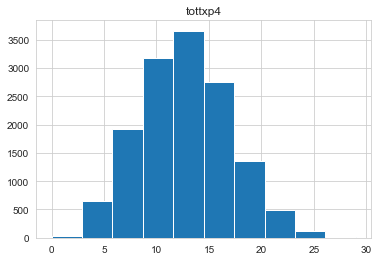

In [95]:
# normalize columns that are continuous
from sklearn import preprocessing

cols = ['tottxp4', 'CWS_0', 'ADHDs_0', 'CDS_0', 'CJSI_0', 'EPS7p_0', 'LRI7_0', 'SRI7_0', 
          'ERS21_0', 'HIVrisk', 'totttld', 'S2x_0', 'SPSm_0']

# visualize data histograms before normalization as a sanity check
df.hist(column=cols[0])

scaler = preprocessing.StandardScaler()
for i in cols:
    df[i] = scaler.fit_transform(df[[i]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a304534a8>]],
      dtype=object)

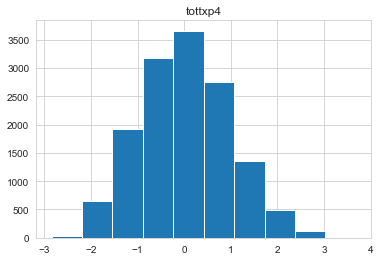

In [96]:
# visualize data histograms after normalization as a sanity check
df.hist(column=cols[0])

In [97]:
# split dataframe so we can predict on california and use all other states to train
state_code = 'TX'
state_name = 'Texas'
geojson_filename = 'tx_texas_zip_codes.geojson'
Xte = df[df.State == state_code]
Xtr = df[df.State != state_code]
Xte.drop(columns=['State'], inplace=True)
Xtr.drop(columns=['State'], inplace=True)
print("non-" + state_name + "-states", Xtr.shape)
print(state_name + "-only", Xte.shape)

non-Texas-states (11991, 35)
Texas-only (2175, 35)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [98]:
# extract Marujiana_Days predictor
Ytr = Xtr['Marijuana_Days'].copy()
Yte = Xte['Marijuana_Days'].copy()
Xtr.drop(columns=['Marijuana_Days'], inplace=True)
Xte.drop(columns=['Marijuana_Days'], inplace=True)

# extract ZIP for re-labelling later
zips_te = Xte['zipcode'].copy()
Xte.drop(columns=['zipcode'], inplace=True)
Xtr.drop(columns=['zipcode'], inplace=True)

Xtr.head(10)


# # SANITY CHECK REMOVE LATER
# Xte = Xte.head(10)
# Yte = Yte.head(10)
# Xtr = Xtr.head(10)
# Ytr = Ytr.head(10)

,female,nonwhite,unemplmt,B2a_0,prsatx,tottxp4,TRI_0,GVS,tsd_0,und15,CWS_0,IPI,S9y10,dldiag,DSS9_0,ADHDs_0,CDS_0,suicprbs_0,CJSI_0,LRI7_0,SRI7_0,ERS21_0,homeless_0,S6,ncar,engage30,init,HIVrisk,totttld,POS_0,S2x_0,SPSm_0,EPS7p_0
2,0,0.0,1.0,16,0.0,0.755090,1.0,4.0,0.0,1.0,-0.400644,3.0,8.0,1.0,2.0,-0.310087,0.268250,1.0,-0.978352,-0.860984,-0.580133,0.370307,0.0,0.0,0.0,1.0,1,-0.271026,6.200567,0.0,-0.496013,-0.272962,-0.142293
3,0,0.0,0.0,16,0.0,0.304707,0.0,0.0,0.0,1.0,-0.400644,2.0,1.0,1.0,1.0,-0.485290,-0.368973,0.0,1.228462,-0.860984,1.055669,0.832530,0.0,0.0,1.0,0.0,1,-0.271026,6.081177,0.0,-0.288749,-0.839410,-0.517028
4,0,1.0,0.0,17,0.0,-0.145677,0.0,0.0,0.0,0.0,0.310071,5.0,8.0,0.0,1.0,0.040318,-0.050362,0.0,0.394777,-0.533655,0.000000,-0.438584,0.0,0.0,0.0,1.0,1,-1.277119,5.827473,0.0,-0.496013,0.010262,0.398992
6,0,1.0,0.0,17,1.0,-0.145677,0.0,3.0,0.0,1.0,-0.400644,3.0,8.0,1.0,1.0,-0.660493,-0.687585,0.0,-0.978352,-0.860984,-0.813819,-0.785252,0.0,0.0,1.0,1.0,1,-0.019502,4.573879,0.0,-0.454560,-0.556186,-0.933401
7,1,1.0,1.0,18,0.0,0.304707,2.0,2.0,1.0,1.0,2.086857,4.0,8.0,1.0,9.0,1.091533,-0.368973,0.0,-0.978352,-0.533655,0.588297,0.139195,0.0,0.0,1.0,1.0,1,-0.774072,4.566417,0.0,-0.454560,0.859935,0.090876
8,0,1.0,0.0,17,1.0,0.755090,1.0,4.0,0.0,1.0,-0.400644,5.0,8.0,1.0,4.0,-1.186100,-1.006197,0.0,0.002454,-0.206326,-0.112761,-0.207473,0.0,0.0,1.0,1.0,1,0.483544,4.491798,4.0,-0.081484,1.992831,-1.058313
9,0,1.0,1.0,17,0.0,0.529899,0.0,4.0,0.0,1.0,-0.400644,2.0,8.0,1.0,2.0,-0.485290,-0.687585,0.0,-0.953831,-0.206326,-1.281191,-0.785252,0.0,0.0,1.0,1.0,1,0.483544,4.439565,0.0,-0.496013,-0.839410,-0.558666
10,0,1.0,0.0,16,0.0,-0.596060,1.0,2.0,0.0,1.0,-0.400644,6.0,8.0,1.0,1.0,-1.186100,-1.006197,0.0,-0.978352,-0.860984,0.588297,-0.091917,0.0,0.0,1.0,1.0,1,-0.522549,4.417179,0.0,-0.496013,-0.839410,-1.058313
11,0,1.0,1.0,16,1.0,-0.145677,0.0,0.0,0.0,1.0,-0.045287,5.0,8.0,1.0,1.0,0.215520,-0.687585,0.0,-0.978352,0.775662,0.000000,0.370307,0.0,0.0,1.0,1.0,1,-0.271026,4.335099,0.0,-0.288749,-0.272962,-0.933401
12,0,1.0,1.0,17,0.0,0.529899,2.0,0.0,0.0,1.0,-0.400644,4.0,8.0,0.0,0.0,-0.660493,0.268250,0.0,-0.978352,-0.533655,0.821983,-0.323028,0.0,0.0,1.0,1.0,1,-0.522549,4.282866,0.0,-0.496013,-0.839410,-0.750197


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV

from sksurv.datasets import load_veterans_lung_cancer
from sksurv.column import encode_categorical
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM
from sksurv.util import Surv

sns.set_style("whitegrid")

estimator = FastSurvivalSVM(optimizer="rbtree", max_iter=1000, tol=1e-6, random_state=0)

#param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
#cv = ShuffleSplit(n_splits=200, test_size=0.5, random_state=0)
#gcv = GridSearchCV(estimator, param_grid, n_jobs=4, iid=False, refit=False, cv=cv)


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

y_temp = Surv.from_arrays(Ytr < 365, Ytr.copy())

#gcv = gcv.fit(Xtr, y_temp)

In [100]:
#pd.DataFrame([gcv.cv_results_["params"], gcv.cv_results_["mean_test_score"], gcv.cv_results_["std_test_score"]]).transpose()

In [101]:
#gcv.best_params_

In [102]:
estimator = FastSurvivalSVM(optimizer="rbtree", max_iter=1000, tol=1e-6, random_state=0, alpha=1)
estimator.fit(Xtr, y_temp)

FastSurvivalSVM(alpha=1, fit_intercept=False, max_iter=1000, optimizer='rbtree',
                random_state=0, rank_ratio=1.0, timeit=False, tol=1e-06,
                verbose=False)

In [103]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
model = CoxPHSurvivalAnalysis()
model.fit(Xtr, y_temp)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, ties='breslow', tol=1e-09, verbose=0)

In [104]:
pred_surv = model.predict_survival_function(Xte)

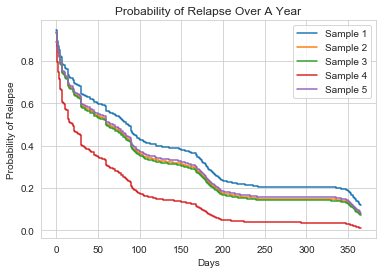

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

for i, c in enumerate(pred_surv[:5]):
    plt.step(c.x, c.y, where="post", label="Sample %d" % (i + 1))
plt.title(title)
plt.ylabel("Probability of Relapse")
plt.xlabel("Days")
plt.legend(loc="best")

Text(0.5, 0, 'Days')

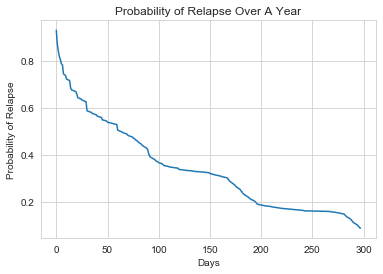

In [106]:
## re-slice the data based on what I want to compare and retrain two models and print individual graphs side by side



title = 'Probability of Relapse Over A Year'

plt.plot(np.mean([person.y for person in pred_surv], axis=0))
plt.title(title)
plt.ylabel("Probability of Relapse")
plt.xlabel("Days")